## 8. k-means
クラスタリングは、データを自然なグループにまとめる方法を見つけ出すことが目標である。  
**k-means**はよく知られたクラスタリングアルゴリズムである。  
また、k-meansは**ハードクラスタリング**であり、データセットのデータ点がそれぞれ1つのクラスタに割り当てられる。  
一方、**ソフトクラスタリング(ファジークラスタリング)**では、データ点を1つ以上のクラスタに割り当てる。
  
**プロトタイプベース**クラスタリングというカテゴリに属しており、各クラスがプロトタイプによって表されている。  
通常、プロトタイプは**セントロイド**か**メドイド**のどちらかである。  
セントロイドは、特徴量が連続値の場合に、類似する点の中心を表す。  
メドイドは、特徴量がカテゴリ値の場合に、特定のクラスに属している点のうち他のすべての点に対する距離が最も短い点を表す。 
  
k-meansの4つの手順にまとめられる。  
1. クラスタの中心の初期値として、データ点から$k$個のセントロイドをランダムに選び出す
2. 各データ点の最も近いセントロイド$\mu^{(j)}$に割り当てる  
3. セントロイドに割り当てられたデータ点を中心に、セントロイドを移動する
4. データ点へのクラスタの割り当てが変化しなくなるか、イテレーションの最大回数に達するまで2～3を繰り返す  
  
類似度としては、**ユークリッド距離の2乗**がよく使われる。  
$m$次元空間にある点$\boldsymbol{x}$、$\boldsymbol{y}$のユークリッド距離の2乗は、次のように定義される。  
$$
d(\boldsymbol{x},\boldsymbol{y})^2=\sum_{j=1}^m(x_j-y_j)^2=|\boldsymbol{x}-\boldsymbol{y}|_2^2
$$
  
k-meansは、**クラスタ内誤差平方和(SSE)**を反復的に最小化するという単純な最適化問題としてのk-meansを考える。  
クラスタ内誤差平方和は、**クラスタ慣性**とも呼ばれる。  
$$
SSE=\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)}|\boldsymbol{x}^{(i)}-\boldsymbol{\mu}^{(j)}|^2_2
$$

ここで、$\boldsymbol{\mu}^{(j)}$はクラスタ$j$の中心点(セントロイド)であり、  
データ点$\boldsymbol{x}^{(i)}$がクラスタ内に存在する場合は$w^{(i,j)}=1$、そうでない場合は$w^{(i,j)}=0$となる。

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-4)
y_km = km.fit_predict(X_std)

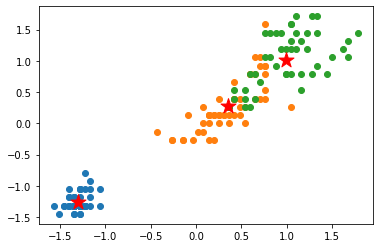

In [22]:
import matplotlib.pyplot as plt
import numpy as np

for i in np.unique(y_km):
    plt.scatter(X_std[y_km==i,2], X_std[y_km==i,3]);
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], s=250, marker='*', c='red')

#### k-means++
セントロイドの初期値を乱数で設定すると、初期値が不適切である場合にクラスタリングがうまくいかないことがある。  
**k-means++法**では、最初のセントロイドを互いに離れた位置に配置することでこの問題に対処する。  
1. 選択の対象となる$k$個のセントロイドを格納するために、空のデータセット$\boldsymbol{M}$を初期化する
2. 入力データから最初のセントロイド$\boldsymbol{\mu}^{(j)}$をランダムに選択し、$\boldsymbol{M}$に割り当てる
3. $\boldsymbol{M}$に含まれていないデータ点$\boldsymbol{x}^{(i)}$ごとに、$\boldsymbol{M}$のセントロイドに対して、距離の2乗$d(\boldsymbol{x}^{(i)},\boldsymbol{M})^2$が最小となるセントロイドを求める
4. 次のセントロイド$\boldsymbol{\mu}^{(p)}$をランダムに選択するために、各データ点との距離によって重みづけされた確率分布を使う  
この分布は次の式で表される  
$$
\frac{d(\boldsymbol{\mu}^{(p)}, \boldsymbol{M})^2}{\sum_id(\boldsymbol{\mu}^{(i)}, \boldsymbol{M})^2}
$$

5. $k$個のセントロイドが選択されるまで、手順3～4を繰り返す
6. 従来のk-means法を使って引継ぎ処理を行う

In [23]:
kmpp = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-4)
y_kmpp = kmpp.fit_predict(X_std)

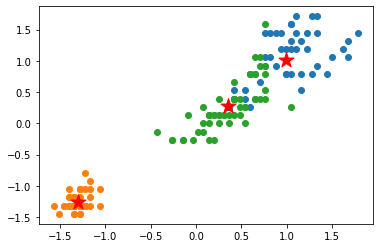

In [24]:
for i in np.unique(y_kmpp):
    plt.scatter(X_std[y_kmpp==i,2], X_std[y_kmpp==i,3]);
plt.scatter(kmpp.cluster_centers_[:,2], kmpp.cluster_centers_[:,3], s=250, marker='*', c='red')

#### MiniBatchKMeans
MiniBatchKMeansは、KMeansを、全データでなくbatch_size分のデータごとに更新する手法である  
大規模なデータの場合に使用が推奨される。

In [36]:
from sklearn.cluster import MiniBatchKMeans

mbkm= MiniBatchKMeans(n_clusters=3, batch_size=10)

y_mbkm = mbkm.fit_predict(X_std)

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


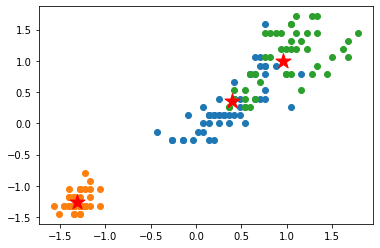

In [37]:
for i in np.unique(y_mbkm):
    plt.scatter(X_std[y_mbkm==i,2], X_std[y_mbkm==i,3]);
plt.scatter(mbkm.cluster_centers_[:,2], mbkm.cluster_centers_[:,3], s=250, marker='*', c='red')

#### MeanShift
KMeansをクラスター数を仮定せずに行う手法。  
その際に規定の距離より近くなったクラスターは合体させて1つにする。

In [47]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=1.5, # カーネルの半径
               cluster_all=True, # 外れ値を最も近いクラスタに分類するか
               n_jobs=-1)

y_ms = ms.fit_predict(X_std)

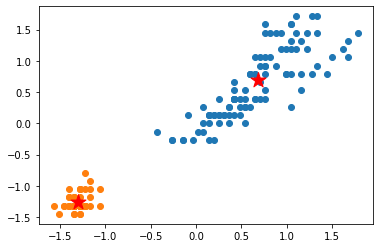

In [48]:
for i in np.unique(y_ms):
    plt.scatter(X_std[y_ms==i,2], X_std[y_ms==i,3]);
plt.scatter(ms.cluster_centers_[:,2], ms.cluster_centers_[:,3], s=250, marker='*', c='red')

#### SpectralClustering
スペクトルはスペクトル分解のことで、スペクトル分解とはデータを基底ベクトルの線形和で表現することである。  
グラフ行列を固有値分解したもので、固有ベクトルをクラスタの数だけ結合したものにKMeansを適用する。  
グラフ行列は、グラフ点同士の関係を行列にしたものである。

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<function matplotlib.pyplot.show(close=None, block=None)>

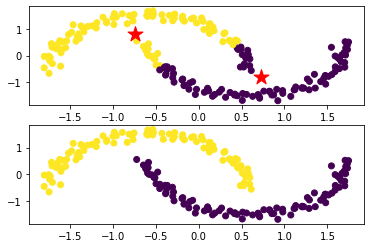

In [51]:
from sklearn.cluster import SpectralClustering
from sklearn import datasets

X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
 
sc = StandardScaler()
X_std = sc.fit_transform(X)

x=X_std[:,0]
y=X_std[:,1]

km = KMeans(n_clusters=2)
z_km = km.fit(X_std)

plt.subplot(2, 1, 1)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show

km = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
z_km = km.fit(X_std)

plt.subplot(2, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.show

#### エルボー法
$k$にさまざまな値を割り当てながらクラスタ内誤差平方和(歪み)をプロットすることで、クラスタの個数$k$を推定する。

C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


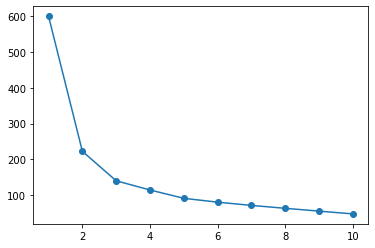

In [25]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300)
    km.fit(X_std)
    distortions.append(km.inertia_)

# k=3がよい選択となる
plt.plot(range(1, 11), distortions, marker='o')

#### シルエット分析
k-means以外のクラスタリングアルゴリズムにも適用できる、性能の評価方法である。  
クラスタ内のデータ点がどの程度密にグループ化されているかの目安となるグラフをプロットする。  
データセットに含まれている1つのデータ点について**シルエット係数**を計算する手順を示す。  
1. クラスタの**凝集度**$a^{(i)}$を計算する  
この凝集度は、同一クラスタ内のデータ点$\boldsymbol{x}^{(i)}$と他の全データ点との平均距離として計算する
2. 最も近いクラスタからの**乖離度**$b^{(i)}$を計算する  
この凝集度は、データ点$\boldsymbol{x}^{(i)}$と最も近くにあるクラスタ内の全データ点との平均距離として計算する
3. クラスタの凝集度と乖離度の差を、それらの大きいほうで割り、シルエット係数$s^{(i)}$を計算する
$$
s^{(i)}=\frac{b^{(i)}-a^{(i)}}{\max{\{b^{(i)},a^{(i)} \}}}
$$

シルエット係数の範囲は-1から1である。  
クラスタの乖離度と凝集度が等しい場合、シルエット係数は0となる。  
さらに,$b^{(i)}>>a^{(i)}$であれば、シルエット係数は1に近づく。

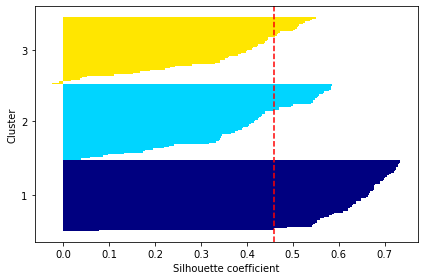

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

kmpp = KMeans(n_clusters=3,
              init='k-means++',
              n_init=10,
              max_iter=300,
              tol=1e-4)
y_kmpp = kmpp.fit_predict(X_std)

cluster_labels = np.unique(y_kmpp)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_kmpp == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()